# Machine Learning Project(Regression)


## Loading Data


In [ ]:
# Importing the necessary libraries and dataset.
#  Data Source: https://www.kaggle.com/datasets/maso0dahmed/football-players-data/data
# Website: https://sofifa.com/players

import pandas as pd

data = pd.read_csv('data/fifa_players.csv')
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [93]:
# Total Number of instances and attributes/features in the dataset.

data.shape

(17954, 51)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

## Data Cleaning & Pre-Processing

1. Removing all the unnecessary variables.

In [95]:
# Dropping all those variables that are not necessary such as name, birth_date, nationality,etc.

exclude_columns = ['name','full_name','birth_date','nationality','wage_euro','international_reputation(1-5)','national_team', 'national_rating', 'national_team_position', 'national_jersey_number', 'release_clause_euro']
data = data.drop(columns = exclude_columns,axis = 1)

2. Feature Engineering.

I have derived new attributes by combining existing attributes using appropriate weights, where the weights indicate the importance of each component variable. FIFA uses a system with predetermined co-efficients associated with the skills required for a particular position. These are called positional coefficients, and I had a sample for a defender position to refer to. For other positions like midfielder and attackers, I applied the same intuition and domain knowledge acquired through watching football and using different resources.

Courtesy: https://www.goal.com

<img src="../assets/Fifa.jpeg" width=600px height=400px />

In [96]:
''' 
Formulating Summarized features by Combining Similar category of features into a Single Attribute
such as acceleration and sprint speed are combined to form Pace.
'''

data['P/A_Ratio'] = data['potential'] / data['age']
data['Defensive_Strength'] = 0.2 * data['interceptions'] + 0.1 * data['standing_tackle'] + 0.2 * data['sliding_tackle'] + 0.2 * data['marking'] + 0.2 * data['strength'] + 0.1 * data['positioning']
data['Passing'] = 0.2 * data['crossing'] + 0.3 * data['short_passing'] + 0.2 * data['long_passing'] + 0.3 * data['vision']
data['Attacking_skills'] = 0.3 * data['finishing'] + 0.2 * data['heading_accuracy']  + 0.1 * data['curve'] + 0.05 * data['volleys'] + 0.2 * data['shot_power'] + 0.15 * data['long_shots']
data['Skills'] = 0.2 * data['skill_moves(1-5)'] + 0.3 * data['dribbling'] + 0.2 * data['ball_control'] + 0.2 * data['agility'] + 0.1 * data['jumping']
data['Mentality'] = 0.4 * data['composure'] + 0.4 * data['aggression'] + 0.2 * data['reactions']
data['Setpiece_accuracy'] = 0.5 * data['freekick_accuracy'] + 0.5 * data['penalties']
data['Pace'] = 0.45 * data['acceleration'] + 0.55 * data['sprint_speed']

In [97]:
# Removing all the overlapping features after Feature Engineering.

data = data.drop(columns=['potential','age','interceptions','standing_tackle','sliding_tackle','marking','strength','positioning','crossing','short_passing','long_passing','vision','finishing','heading_accuracy','curve','volleys','shot_power','skill_moves(1-5)','dribbling','ball_control','agility','jumping','composure','aggression','reactions','freekick_accuracy','penalties', 'long_shots','acceleration','sprint_speed'])

3. Removing Null Values from the dataset.

In [98]:
# Checking for Null values in the dataset.

data.isna().sum()

height_cm               0
weight_kgs              0
positions               0
overall_rating          0
value_euro            255
preferred_foot          0
weak_foot(1-5)          0
body_type               0
balance                 0
stamina                 0
P/A_Ratio               0
Defensive_Strength      0
Passing                 0
Attacking_skills        0
Skills                  0
Mentality               0
Setpiece_accuracy       0
Pace                    0
dtype: int64

In [99]:
# Imputation of Null or NaN values with Median.
# Median is considered as the best imputation method here as it insensitive to outliers.

data['value_euro'] = data['value_euro'].fillna(data['value_euro'].median())

In [100]:
# Checking for outliers based on positional values.

data.describe().T

,count,mean,std,min,25%,50%,75%,max
height_cm,17954.0,1.749469e+02,1.402945e+01,152.400000,154.940000,175.260000,1.854200e+02,2.057400e+02
weight_kgs,17954.0,7.530105e+01,7.083684e+00,49.900000,69.900000,74.800000,7.980000e+01,1.102000e+02
overall_rating,17954.0,6.624017e+01,6.963730e+00,47.000000,62.000000,66.000000,7.100000e+01,9.400000e+01
value_euro,17954.0,2.454009e+06,5.650405e+06,10000.000000,325000.000000,700000.000000,2.000000e+06,1.105000e+08
weak_foot(1-5),17954.0,2.945695e+00,6.636915e-01,1.000000,3.000000,3.000000,3.000000e+00,5.000000e+00
balance,17954.0,6.387006e+01,1.417404e+01,16.000000,56.000000,66.000000,7.400000e+01,9.600000e+01
stamina,17954.0,6.313384e+01,1.591755e+01,12.000000,56.000000,66.000000,7.400000e+01,9.700000e+01
P/A_Ratio,17954.0,2.900965e+00,6.433876e-01,1.066667,2.387097,2.826087,3.363636e+00,5.176471e+00
Defensive_Strength,17954.0,5.069615e+01,1.567276e+01,13.400000,38.200000,53.800000,6.370000e+01,8.520000e+01
Passing,17954.0,5.406472e+01,1.403579e+01,8.800000,46.300000,56.800000,6.400000e+01,9.260000e+01


In [101]:
data.shape

(17954, 18)

5. Categorical Variables

In [102]:
data['preferred_foot'].unique()

array(['Left', 'Right'], dtype=object)

In [103]:
data['body_type'].unique()

array(['Messi', 'Lean', 'Normal', 'Stocky', 'Courtois',
       'PLAYER_BODY_TYPE_25', 'Akinfenwa', 'Shaqiri', 'Neymar',
       'C. Ronaldo'], dtype=object)

In [ ]:
data = data[data['body_type'].isin(['Lean', 'Normal', 'Stocky'])]

In [105]:
# Transforming Categorical Attributes like Preferred_foot, BodyType into Binary Attributes.

data_encoded = pd.get_dummies(data, columns=['preferred_foot', 'body_type'])
one_hot_columns = data_encoded.columns.difference(data.columns)
data_encoded[one_hot_columns] = data_encoded[one_hot_columns].astype(int)

In [106]:
data_encoded.shape

(17947, 21)

In [108]:
data_encoded.head()

,height_cm,weight_kgs,positions,overall_rating,value_euro,weak_foot(1-5),balance,stamina,P/A_Ratio,Defensive_Strength,...,Attacking_skills,Skills,Mentality,Setpiece_accuracy,Pace,preferred_foot_Left,preferred_foot_Right,body_type_Lean,body_type_Normal,body_type_Stocky
1,154.94,76.2,"CAM,RM,CM",88,69500000.0,5,81,92,3.296296,53.1,...,77.45,65.2,71.2,77.0,74.35,0,1,1,0,0
2,190.50,83.9,"CM,CAM",88,73000000.0,4,66,88,3.640000,71.1,...,80.55,68.6,82.4,82.0,75.40,0,1,0,1,0
3,162.56,59.0,"LW,ST",88,62000000.0,4,93,75,3.259259,39.3,...,74.30,70.5,63.4,69.0,89.60,0,1,0,1,0
4,187.96,88.9,CB,88,60000000.0,3,40,75,3.370370,83.2,...,39.95,51.8,83.2,30.5,72.75,0,1,0,1,0
5,193.04,92.1,CB,88,59500000.0,3,49,75,3.333333,83.8,...,66.25,57.6,85.0,66.0,75.65,0,1,0,1,0


In [109]:
data_encoded['positions'].unique()

array(['CAM,RM,CM', 'CM,CAM', 'LW,ST', 'CB', 'RW,ST,RM', 'ST', 'GK',
       'CDM,CM', 'CF,ST', 'CAM,RW', 'CDM', 'CM,CDM', 'LB', 'CM,CAM,CDM',
       'CAM,CM,LW', 'CAM,CM,RM', 'LW,ST,LM', 'CAM,CM', 'CAM', 'LW,RW',
       'RW,LW', 'CM,LM', 'CM', 'RM,RW', 'LM,RM,CAM,LW', 'LM', 'RW,RM',
       'LM,ST,RM', 'RB', 'LM,RM,LW,RW', 'LM,CAM,RM', 'RM,LM,ST', 'RW',
       'LM,ST,RM,LW', 'CM,CDM,CAM', 'CM,CDM,CB', 'CB,CDM', 'CF,ST,CAM',
       'CDM,CB', 'RB,RWB', 'RM', 'LM,CAM', 'CM,LW', 'LB,LWB,LM', 'ST,LW',
       'LM,LB,CM', 'RB,RM', 'RM,LM,CM', 'LM,RM,CAM', 'RM,RW,ST',
       'LW,LM,RW', 'LB,LM', 'ST,LW,LM', 'RM,CM', 'CM,RM', 'CB,RB',
       'RM,RW,LM', 'LM,RM', 'CDM,CB,CM', 'CAM,CDM', 'LB,CDM', 'CAM,RM,LM',
       'RM,CAM,CM', 'LWB', 'CDM,CM,LM', 'CDM,CM,RM', 'CDM,CM,CB',
       'CAM,LW', 'RM,LM', 'ST,CAM', 'LM,CM', 'ST,CF,CAM,LM',
       'LWB,LB,CB,LM', 'RB,LB', 'LW', 'CAM,ST', 'LM,RM,LW', 'LWB,LM,LB',
       'ST,CF,LM,CAM', 'LM,LW,ST', 'LB,LWB', 'RWB,RB,RM', 'ST,RW',
       'CAM,CM,LM', 'RB,R

In [110]:
data = data_encoded
data['Position_Count'] = data['positions'].apply(lambda x: len(x.split(',')))

In [111]:
# Based on the Position, the players are being narrowed down to 4 Main Categories namely
#  1. Forward
#  2. Midfielder
#  3. Defender
#  4. Goalkeeper

data.loc[data['positions'].str.contains('ST', case=False), 'positions'] = 'Forward'
data.loc[data['positions'].str.contains('M', case=False), 'positions'] = 'Midfielder'
data.loc[data['positions'].str.contains('B', case=False), 'positions'] = 'Defender'
data.loc[data['positions'].str.contains('W', case=False), 'positions'] = 'Forward'
data.loc[data['positions'].str.contains('CF', case=False), 'positions'] = 'Forward'
data.loc[data['positions'].str.contains('GK', case=False), 'positions'] = 'GoalKeeper'

In [112]:
data['positions'].unique()

array(['Midfielder', 'Forward', 'Defender', 'GoalKeeper'], dtype=object)

In [113]:
data['positions'].value_counts()

positions
Midfielder    7496
Defender      4896
Forward       3491
GoalKeeper    2064
Name: count, dtype: int64

In [114]:
# Removing the instance where player is Goalkeeper.
# This is because there are no relevant attributes that describe a goalkeeper's performance.

data= data[data['positions'] != 'GoalKeeper']

In [115]:
data['positions'].value_counts()

positions
Midfielder    7496
Defender      4896
Forward       3491
Name: count, dtype: int64

In [116]:
# Transforming Categorical Attributes like Positions Played into Binary Attributes.

data_encoded = pd.get_dummies(data, columns=['positions'])
one_hot_columns = data_encoded.columns.difference(data.columns)
data_encoded[one_hot_columns] = data_encoded[one_hot_columns].astype(int)

In [117]:
data_encoded.shape

(15883, 24)

In [118]:
data = data_encoded
data.head()

,height_cm,weight_kgs,overall_rating,value_euro,weak_foot(1-5),balance,stamina,P/A_Ratio,Defensive_Strength,Passing,...,Pace,preferred_foot_Left,preferred_foot_Right,body_type_Lean,body_type_Normal,body_type_Stocky,Position_Count,positions_Defender,positions_Forward,positions_Midfielder
1,154.94,76.2,88,69500000.0,5,81,92,3.296296,53.1,90.0,...,74.35,0,1,1,0,0,3,0,0,1
2,190.50,83.9,88,73000000.0,4,66,88,3.640000,71.1,86.2,...,75.40,0,1,0,1,0,2,0,0,1
3,162.56,59.0,88,62000000.0,4,93,75,3.259259,39.3,84.4,...,89.60,0,1,0,1,0,2,0,1,0
4,187.96,88.9,88,60000000.0,3,40,75,3.370370,83.2,53.1,...,72.75,0,1,0,1,0,1,1,0,0
5,193.04,92.1,88,59500000.0,3,49,75,3.333333,83.8,68.5,...,75.65,0,1,0,1,0,1,1,0,0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15883 entries, 1 to 17953
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   height_cm             15883 non-null  float64
 1   weight_kgs            15883 non-null  float64
 2   overall_rating        15883 non-null  int64  
 3   value_euro            15883 non-null  float64
 4   weak_foot(1-5)        15883 non-null  int64  
 5   balance               15883 non-null  int64  
 6   stamina               15883 non-null  int64  
 7   P/A_Ratio             15883 non-null  float64
 8   Defensive_Strength    15883 non-null  float64
 9   Passing               15883 non-null  float64
 10  Attacking_skills      15883 non-null  float64
 11  Skills                15883 non-null  float64
 12  Mentality             15883 non-null  float64
 13  Setpiece_accuracy     15883 non-null  float64
 14  Pace                  15883 non-null  float64
 15  preferred_foot_Left   15

In [120]:
data.columns

Index(['height_cm', 'weight_kgs', 'overall_rating', 'value_euro',
       'weak_foot(1-5)', 'balance', 'stamina', 'P/A_Ratio',
       'Defensive_Strength', 'Passing', 'Attacking_skills', 'Skills',
       'Mentality', 'Setpiece_accuracy', 'Pace', 'preferred_foot_Left',
       'preferred_foot_Right', 'body_type_Lean', 'body_type_Normal',
       'body_type_Stocky', 'Position_Count', 'positions_Defender',
       'positions_Forward', 'positions_Midfielder'],
      dtype='object')

## Exploratory Data Analysis (EDA)

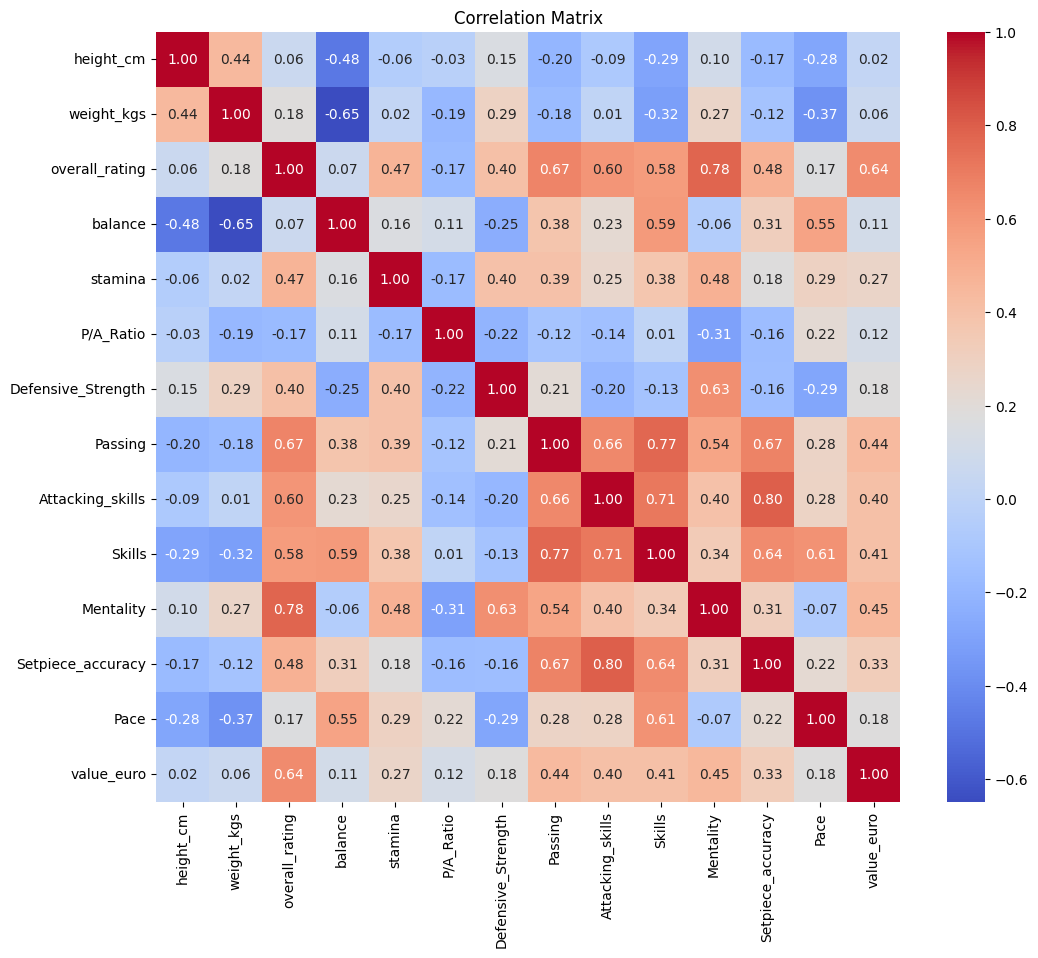

In [122]:
# Plotting Correlation diagram to explore the relationships between the variables in train data set.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

new_Data = data[['height_cm', 'weight_kgs', 'overall_rating','balance', 'stamina', 'P/A_Ratio',
       'Defensive_Strength', 'Passing', 'Attacking_skills', 'Skills',
       'Mentality', 'Setpiece_accuracy', 'Pace','value_euro']]

corr_matrix = new_Data.corr()
# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Axes: ylabel='Density'>

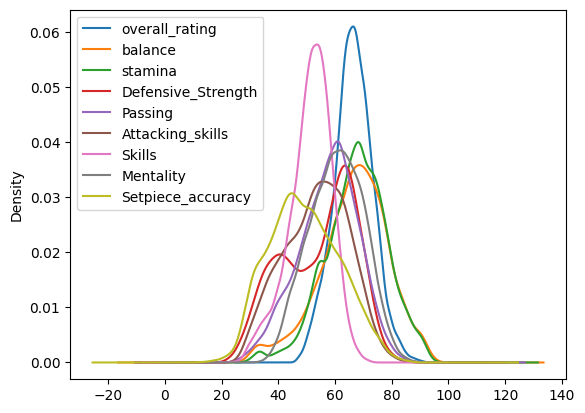

In [123]:
data.iloc[:,[2,5,6,8,9,10,11,12,13]].plot.kde()

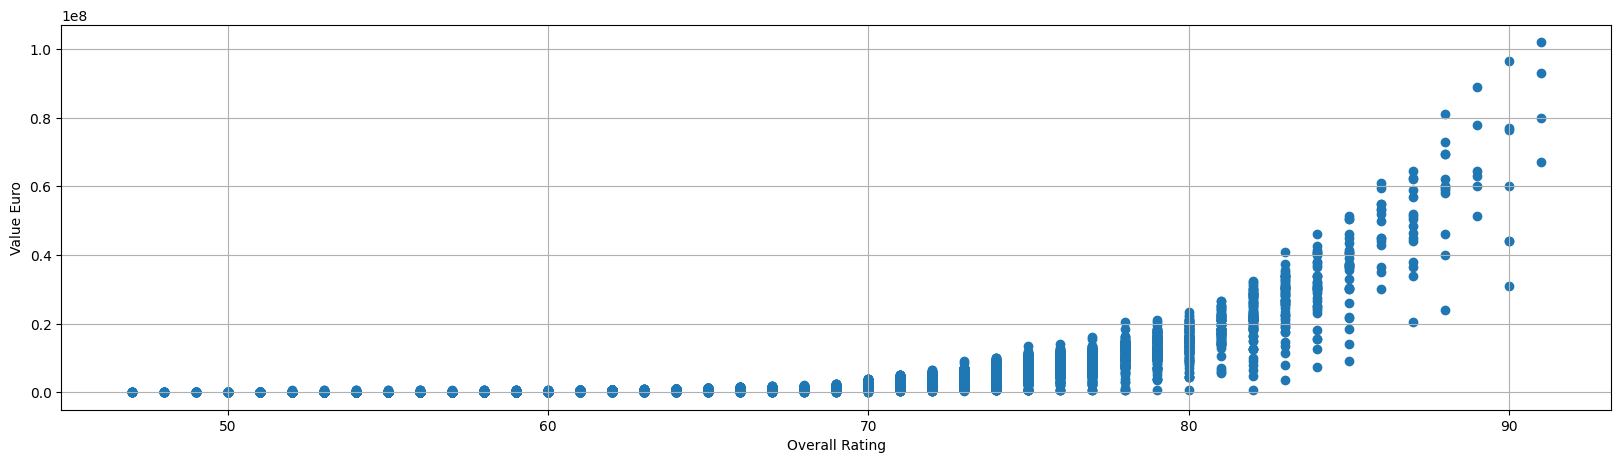

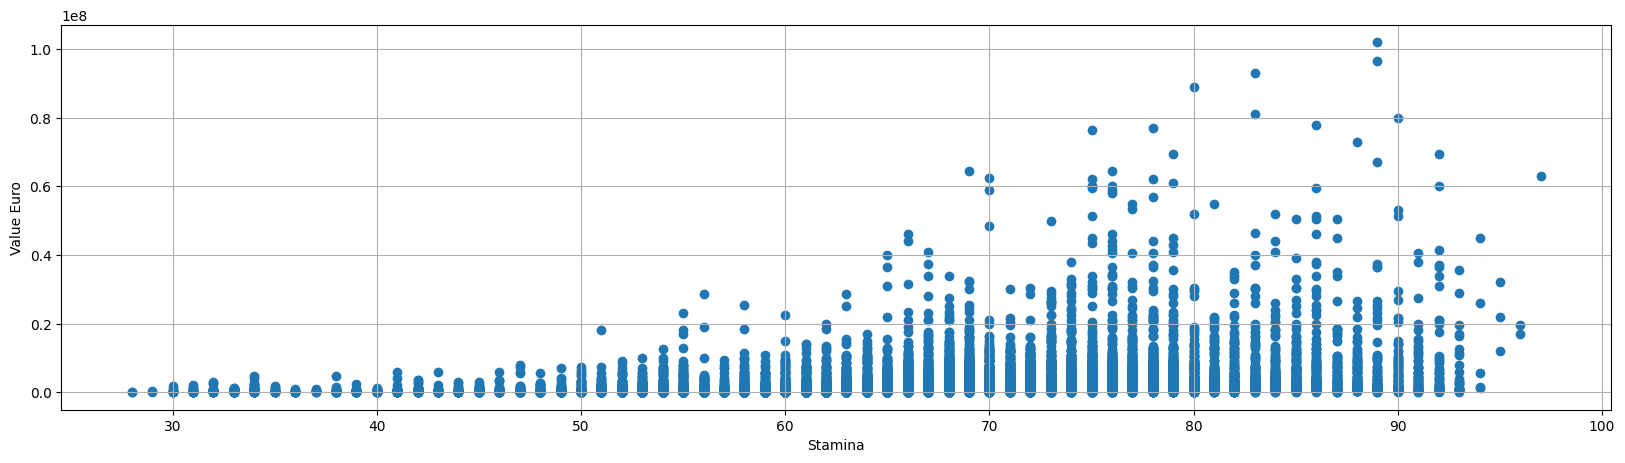

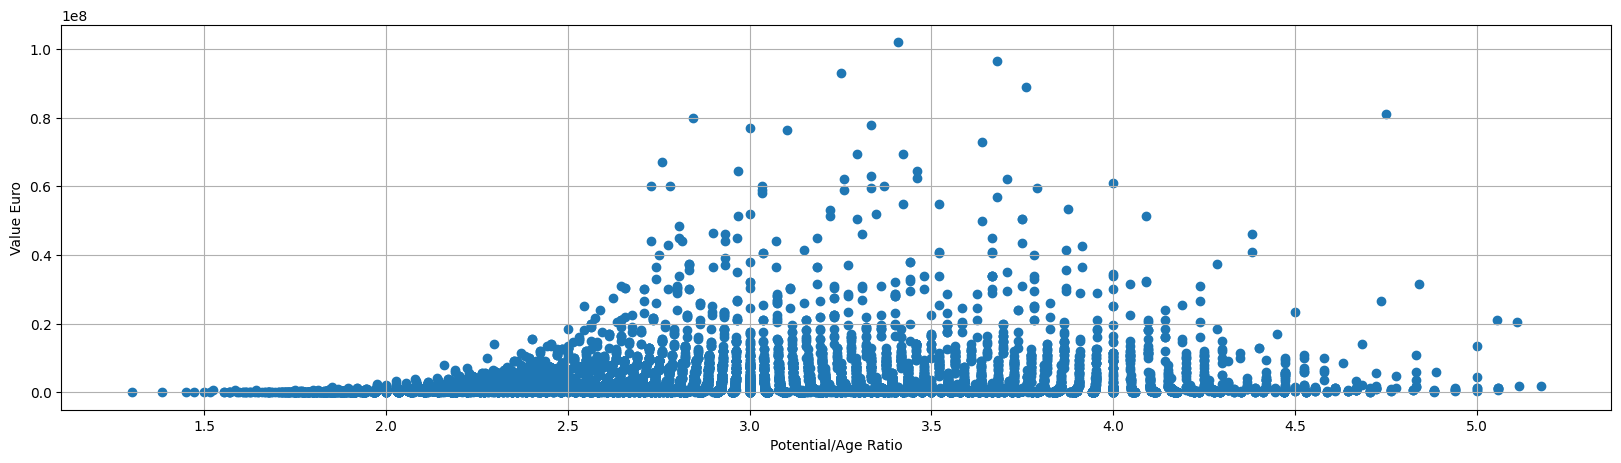

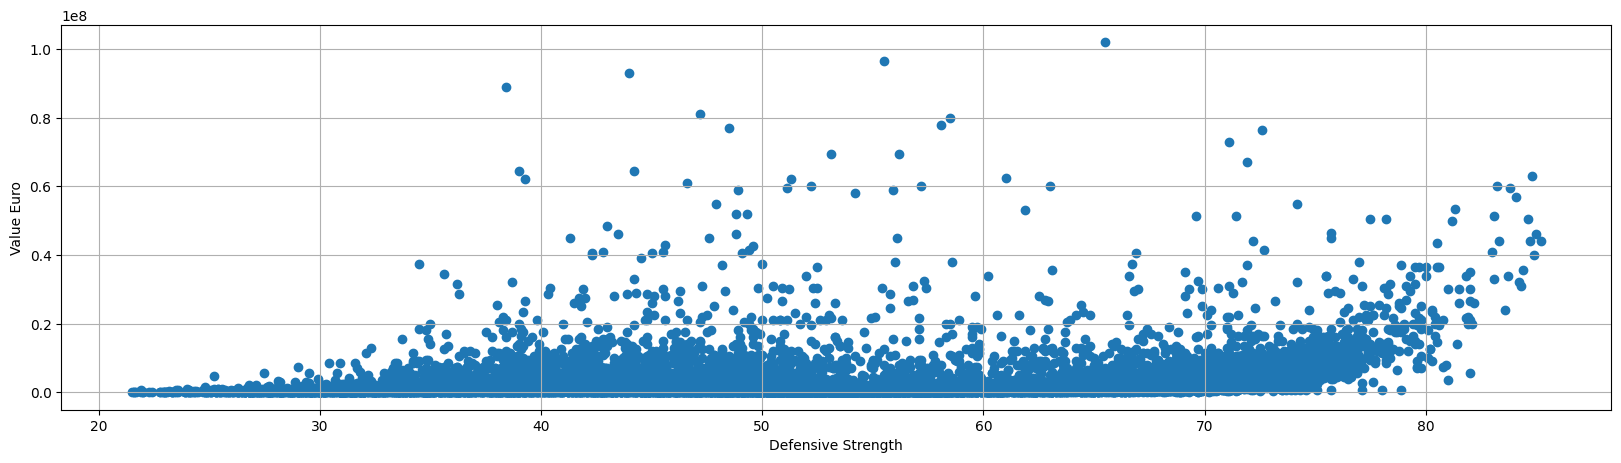

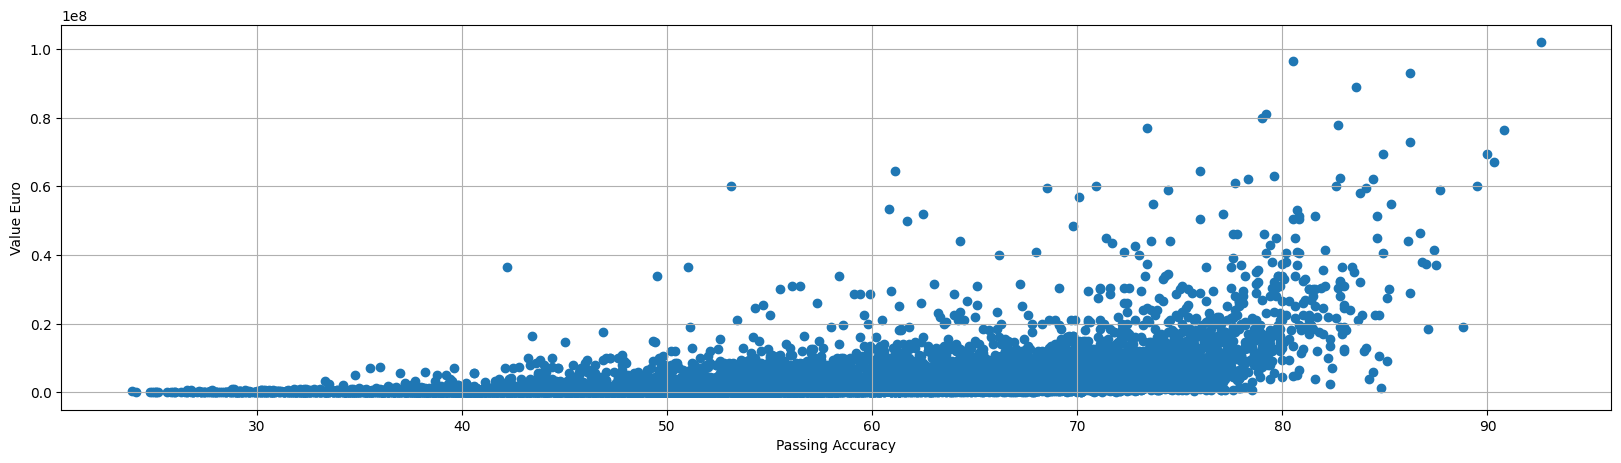

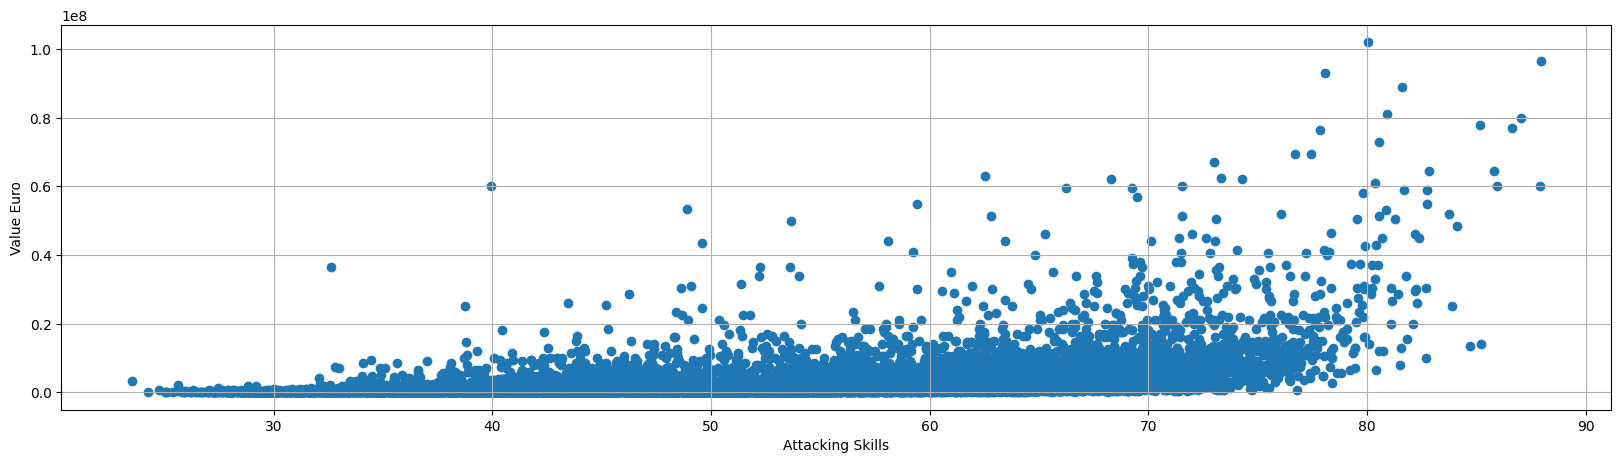

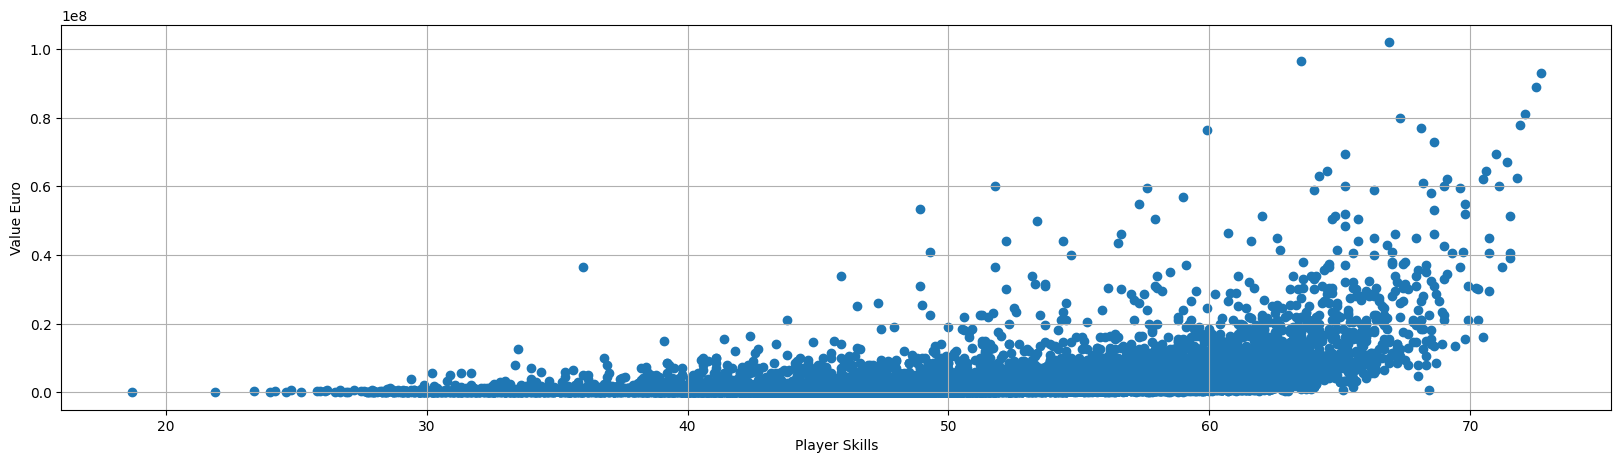

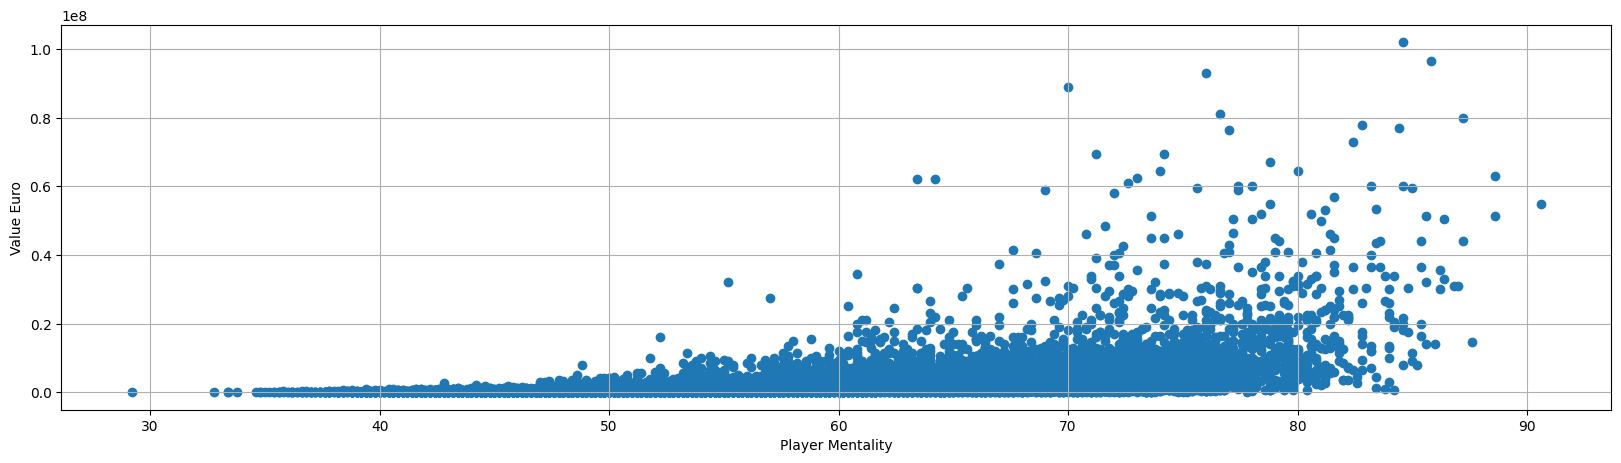

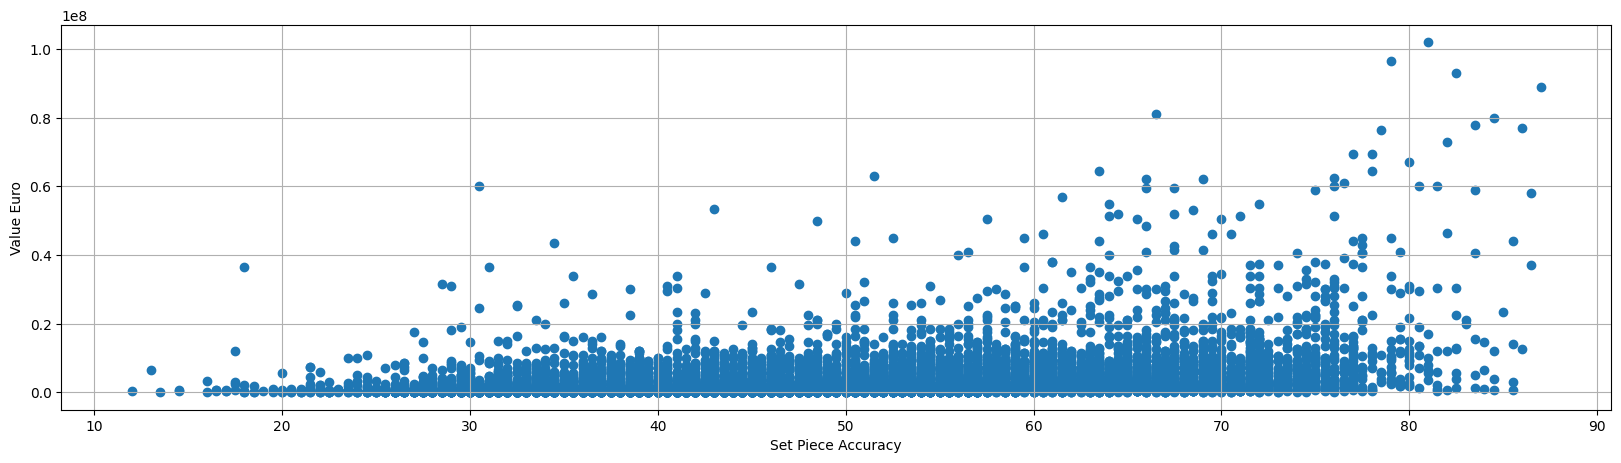

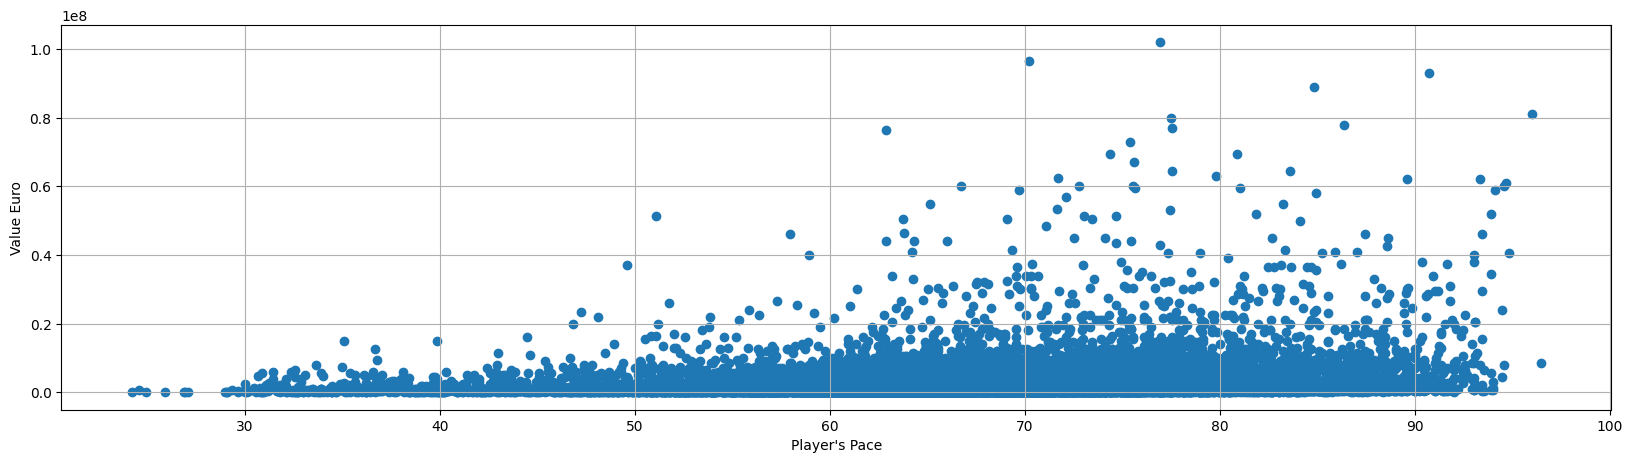

In [124]:
# Knowing relationship b/w the Numeric Variables and the Player's Value.

import matplotlib.pyplot as plt

data_numeric = data[['overall_rating', 'stamina', 'P/A_Ratio',
       'Defensive_Strength', 'Passing', 'Attacking_skills', 'Skills',
       'Mentality', 'Setpiece_accuracy', 'Pace']]

labels = {"overall_rating":"Overall Rating","stamina":"Stamina","P/A_Ratio":"Potential/Age Ratio",
          "Defensive_Strength":"Defensive Strength","Passing":"Passing Accuracy",
          "Attacking_skills":"Attacking Skills","Mentality":"Player Mentality",
          "Setpiece_accuracy":"Set Piece Accuracy","Pace":"Player's Pace","Skills":"Player Skills",}

for attr in data_numeric.columns:
       plt.figure(figsize=(20,5))
       x_axis = data[attr]
       y_axis = data["value_euro"]
       plt.xlabel(labels[attr])
       plt.ylabel("Value Euro")
       plt.grid(True)
       plt.scatter(x_axis,y_axis)
       plt.show()

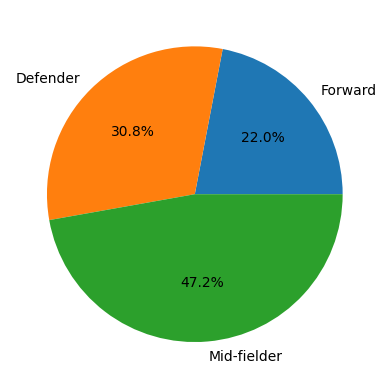

In [125]:
# Plotting Pie Chart to show the distribution of Players.

import matplotlib.pyplot as plt

players = [data["positions_Forward"].sum(),data["positions_Defender"].sum(),data["positions_Midfielder"].sum()]
labels = ["Forward","Defender","Mid-fielder"]

plt.pie(players,labels = labels,autopct='%1.1f%%')
plt.show() 

<Axes: >

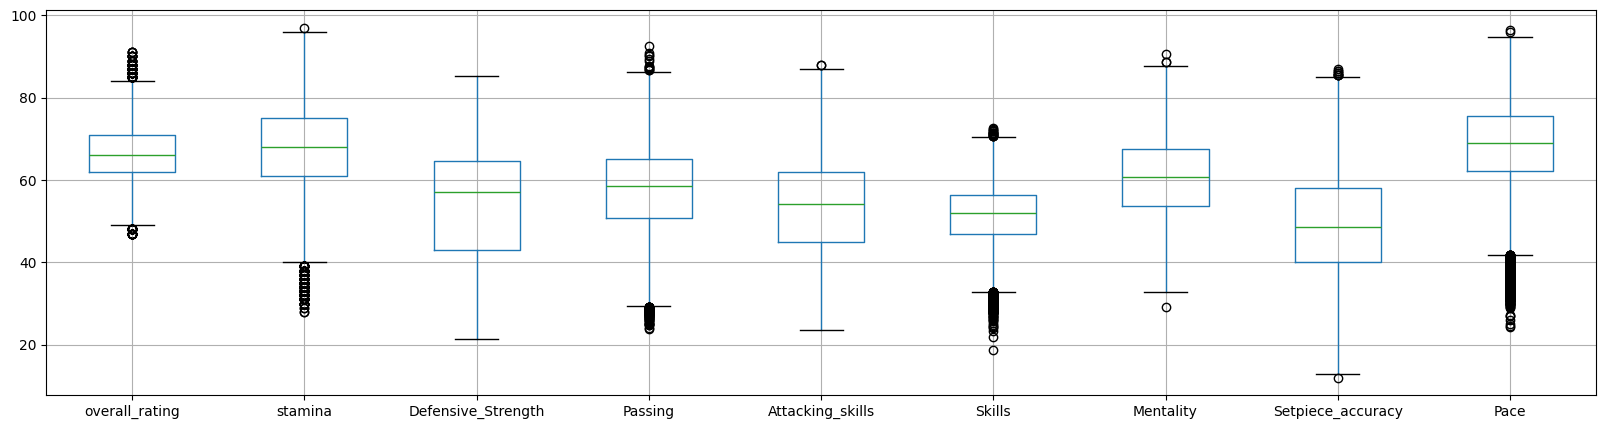

In [126]:
# Plotting the Boxplot for the dataset.

data_numeric = data[['overall_rating', 'stamina', 
       'Defensive_Strength', 'Passing', 'Attacking_skills', 'Skills',
       'Mentality', 'Setpiece_accuracy', 'Pace']]

data_numeric.boxplot(figsize=(20,5))

The box plot shows the distribution of player ratings across different attributes. It can be observed that:

Pace and Stamina have the highest median ratings, indicating that players generally have higher ratings in these attributes.
Skills and Attacking Skills have lower median ratings compared to other attributes.
The interquartile ranges are relatively similar across all attributes, suggesting a consistent spread of ratings within each attribute.
There are some outliers present in several attributes, indicating players with exceptionally high or low ratings in those areas.

Overall, the box plot provides a visual representation of the player rating distribution and can be used to identify trends and insights about player attributes. For example, it suggests that while players generally have high pace and stamina, there is a greater variance in skills and attacking skills ratings.

<Axes: >

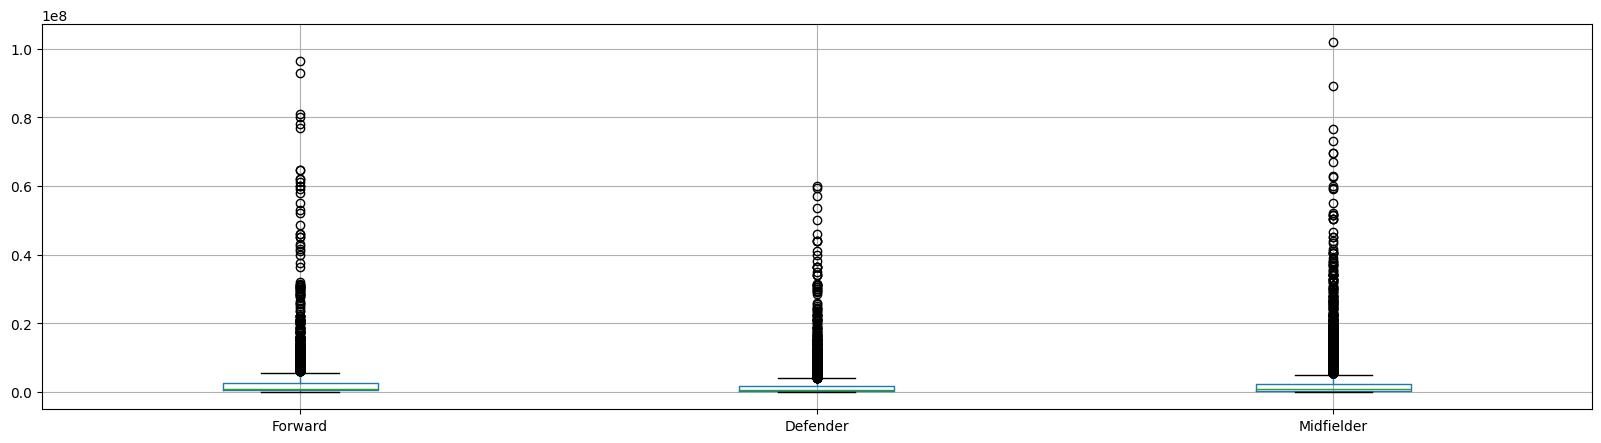

In [127]:
# Plotting a Boxplot to know the Value of Player based on their position.

forward_data = data[data['positions_Forward'] == 1]
defender_data = data[data['positions_Defender'] == 1]
midfielder_data = data[data['positions_Midfielder'] == 1]

position_data = pd.DataFrame({'Forward': forward_data['value_euro'],
                              'Defender': defender_data['value_euro'],
                              'Midfielder': midfielder_data['value_euro']})

position_data.boxplot(grid=True,figsize=(20,5))

The box plot shows that the market value of defenders is higher than that of forwards and midfielders. The median market value of defenders is around 1 million, while the median market value of forwards and midfielders is around 0.7 million. The box plot also shows that there are a lot of outliers for all three positions, indicating that there are some players with very high market values. Overall, the box plot suggests that defenders are more valuable in the market than forwards and midfielders.

<Axes: >

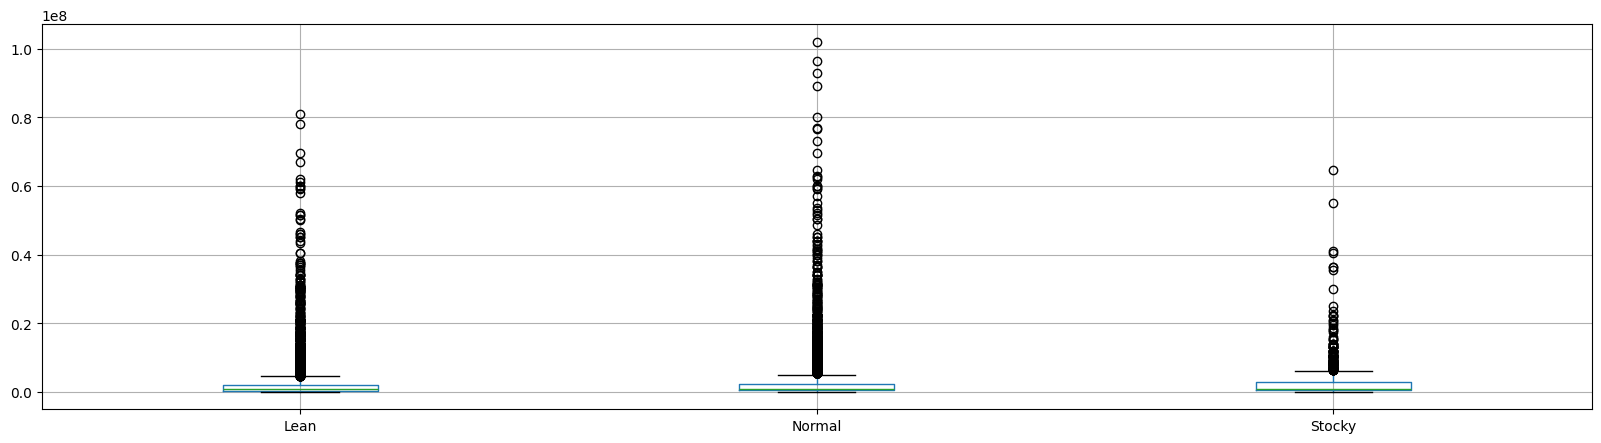

In [128]:
# Plotting a Boxplot to know the Value of Player based on their Body Type.

lean_data = data[data['body_type_Lean'] == 1]
stocky_data = data[data['body_type_Stocky'] == 1]
normal_data = data[data['body_type_Normal'] == 1]

bodyType_data = pd.DataFrame({'Lean': lean_data['value_euro'],
                              'Normal': normal_data['value_euro'],
                              'Stocky': stocky_data['value_euro']})

bodyType_data.boxplot(grid=True,figsize=(20,5))

The boxplot shows that the median value of the "Normal" group is higher than the median value of the "Lean" group. However, there is a lot of overlap in the two groups, so I can't say for sure that there is a significant difference between the two. The "Stocky" group has the highest median value, but also has the largest range and the most outliers. This suggests that the "Stocky" group is the most variable.

Overall, the boxplot suggests that there is some variation in the value of the euro across the three groups. However, the differences between the groups are not large enough to say for sure that they are significantly different.

<Axes: >

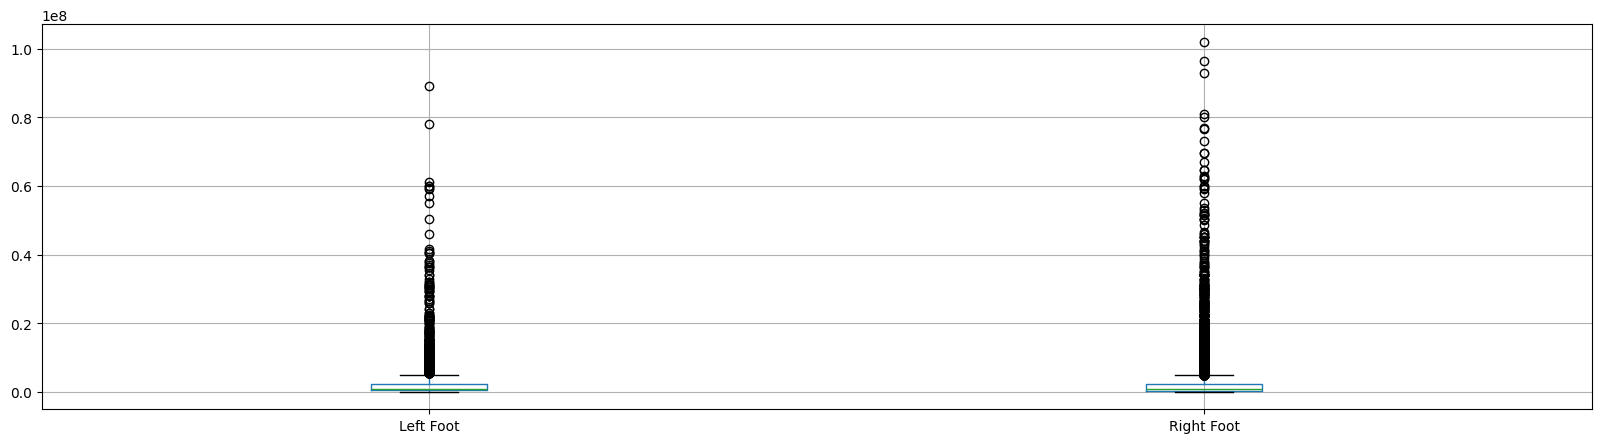

In [129]:
# Plotting a Boxplot to know the Value of Player based on their Preferred foot.

left_data = data[data['preferred_foot_Left'] == 1]
right_data = data[data['preferred_foot_Right'] == 1]

foot_data = pd.DataFrame({'Left Foot': left_data['value_euro'],
                              'Right Foot': right_data['value_euro']})

foot_data.boxplot(grid=True,figsize=(20,5))

The box plot shows the distribution of values for "Left Foot" and "Right Foot". The median value for "Right Foot" is higher than the median value for "Left Foot". The box plot also shows that the range of values for "Right Foot" is wider than the range of values for "Left Foot".

In conclusion, the box plot suggests that the "Right Foot" values are generally higher than the "Left Foot" values and have a wider range. It's important to note that without knowing the context of these values, it's impossible to definitively conclude what this means in terms of Euros.

## Model Building

In [130]:
label = data.pop('value_euro')
data.drop(["height_cm","weight_kgs"],axis = 1,inplace = True)

In [131]:
# Splitting the dataset. (80:20)

from sklearn.model_selection import train_test_split

# First, split the data into Training + Validation and Test sets.
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [132]:
y_train

5601       170000.0
494       5000000.0
1968      1700000.0
9318       525000.0
8959       500000.0
            ...    
15210     3000000.0
6238       210000.0
937       2400000.0
17851    26500000.0
8432       375000.0
Name: value_euro, Length: 12706, dtype: float64

### XGBoost Regressor (Extreme Gradient Boosting) with HyperParameter Tuning (HPT)

XGBoost Regression is a powerful and versatile tool that excels in delivering high performance and accuracy. It effectively handles complex data, prevents overfitting, and provides valuable insights into feature importance. Its robustness, flexibility, and scalability, along with strong community support, make it a top choice for many regression tasks.

In [133]:
# Performing XGBoost Regression using Pipeline with and Hyperparameter Tuning.

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score 


# Tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.09,0.1,],
    'n_estimators': [50, 100,200]
}

grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')

# Training the model on the most optimal HyperParameter Combination.
best_xgb_model = xgb.XGBRegressor(**grid_search.best_params_)

best_xgb_model.fit(X_train, y_train)

Best parameters: {'learning_rate': 0.09, 'max_depth': 3, 'n_estimators': 200}


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [134]:
# Make predictions on the Training set (including Validation set).
y_pred_train = best_xgb_model.predict(X_train)

# Evaluating the evaluation metrics on Training Data.
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

# Display the metrics value.
print(f"The MSE on Training data: {(mse/len(y_train)):.2f}")
print(f"The  R2 score on Training data: {r2:.2f}")


The MSE on Training data: 12297769.65
The  R2 score on Training data: 1.00


In [135]:
# Make predictions on the Test set.
y_pred = best_xgb_model.predict(X_test)

# Evaluating the evaluation metrics on Test Data.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics value.
print(f"The MSE on Test data: {mse/len(y_test):.2f}")
print(f"The R2 Score on Test data: {r2:.2f}")

The MSE on Test data: 153591365.28
The R2 Score on Test data: 0.98


In [ ]:
import joblib

joblib.dump(best_xgb_model, "models/xgboost_player_value.pkl")

['xgboost_player_value.pkl']